In [308]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Packages and imports

In [309]:
import pandas as pd
import numpy as np
import networkx as nx
import torch
import random
import matplotlib.pyplot as plt

In [310]:
!pip install torch_geometric -q
!pip install torcheval -q
!pip install torchmetrics -q
!pip install karateclub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [311]:
from karateclub.dataset import GraphReader

reader = GraphReader("twitch")

G = reader.get_graph()
y = reader.get_target()

In [312]:
print(G)

Graph with 7126 nodes and 35324 edges


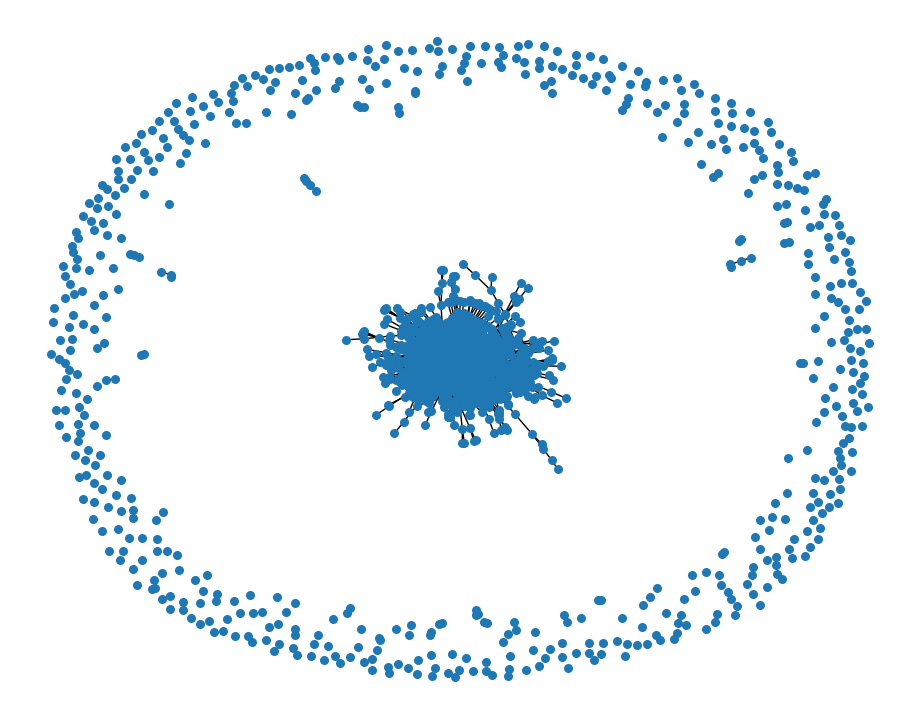

In [18]:
plt.figure(figsize=(9, 7))
nx.draw_spring(G.subgraph([i for i in range(2000)]), node_size=30, arrows=False)
plt.show()

# Graph

## Edges

## Create graph

In [23]:
H = G.edge_subgraph(list(G.edges)[:1000])
print(H)

Graph with 930 nodes and 1000 edges


In [21]:
print(nx.is_connected(G))

True


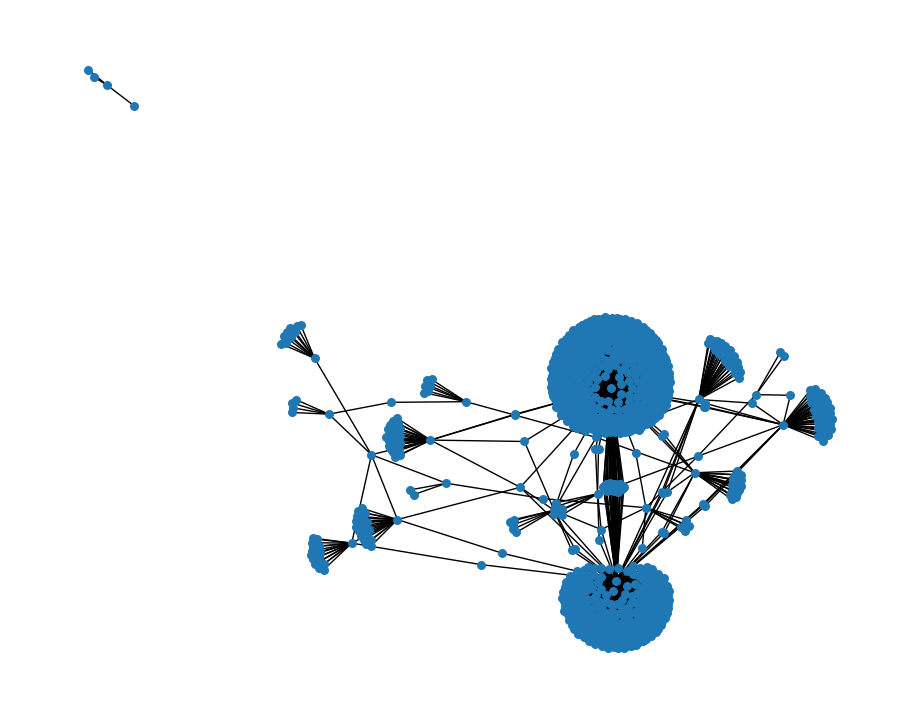

In [24]:
plt.figure(figsize=(9, 7))
nx.draw_spring(H, node_size=30, arrows=False)
plt.show()

### Degree embeddings

In [25]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import torch

# using degree as embedding
embeddings = np.array(list(dict(G.degree()).values()))

# normalizing degree values
scale = MinMaxScaler()
embeddings = scale.fit_transform(embeddings.reshape(-1,1))

# Word2Vec


In [26]:
# !pip install word2vec
!pip install -q node2vec

In [27]:
from node2vec import Node2Vec
node2vec = Node2Vec(G, dimensions=128, walk_length=40, num_walks=10, workers=2)

Computing transition probabilities:   0%|          | 0/7126 [00:00<?, ?it/s]

In [260]:
model = node2vec.fit(window=10, min_count=1)

In [261]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def plot_nodes(word_list):
    X = model.wv[word_list]

    # reduce dimensions to 2
    pca = PCA(n_components=2)
    result = pca.fit_transform(X)


    plt.figure(figsize=(12,9))
    # create a scatter plot of the projection
    plt.scatter(result[:, 0], result[:, 1])
    for i, word in enumerate(word_list):
        plt.annotate(word, xy=(result[i, 0], result[i, 1]))

    plt.show()

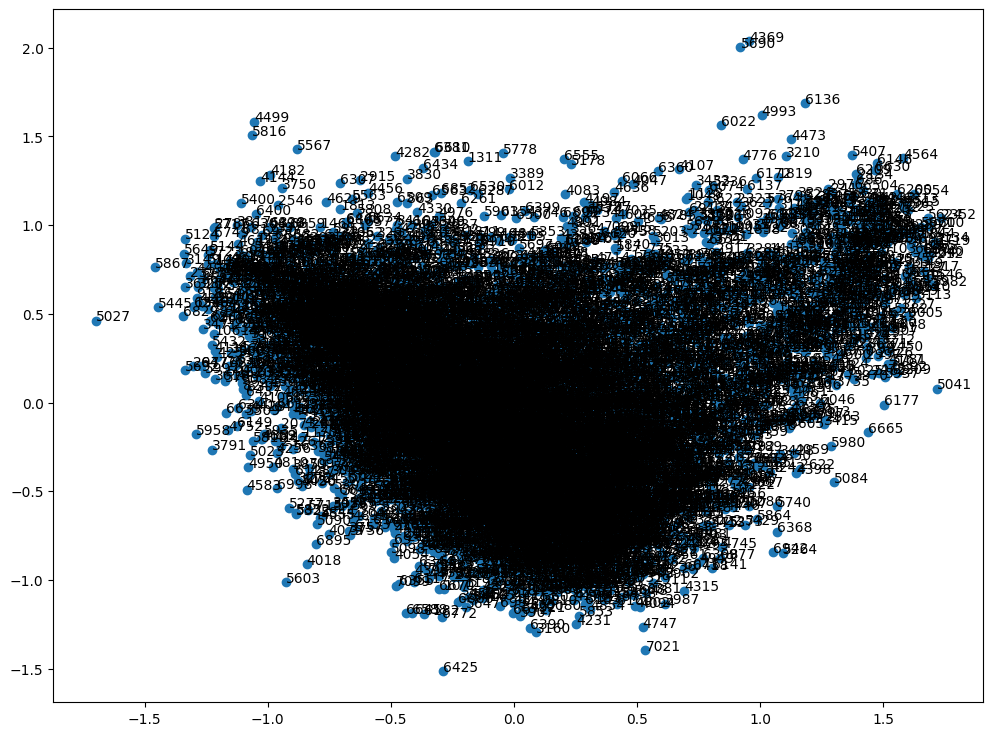

In [262]:
numbers = list(G.nodes)
plot_nodes(numbers)

In [263]:
model.wv.get_vector(0)

array([-0.00068256,  0.15812966, -0.02030476,  0.21411806, -0.09803824,
       -0.03687263,  0.01805848,  0.16724163, -0.02933666,  0.15823805,
        0.23657335,  0.05743019,  0.13303311, -0.0046187 ,  0.19059445,
        0.16925402, -0.02436746, -0.05134017, -0.2857125 , -0.24549799,
        0.3006764 ,  0.13424717,  0.05574744, -0.00784917, -0.02918952,
        0.00127182, -0.2391826 ,  0.10331283,  0.10874524,  0.09233525,
       -0.539259  ,  0.0709894 , -0.03458475, -0.18671726,  0.14671922,
        0.04568163,  0.19134885, -0.22634622, -0.02646878,  0.04916018,
        0.04040828,  0.13234787, -0.07539175, -0.34995428, -0.08950061,
       -0.07199325, -0.20806374,  0.06558445,  0.25531343,  0.35096294,
       -0.04881612,  0.13917002, -0.01387429,  0.02228653,  0.28245082,
       -0.00397273,  0.27145815, -0.00367657, -0.25772464,  0.0921408 ,
       -0.25023538,  0.12798597,  0.03017859,  0.03597946,  0.12829214,
       -0.2521156 ,  0.22726963,  0.16236432,  0.0187526 , -0.06

In [264]:
words = list(w for w in model.wv.index_to_key)

In [265]:
len(words)


7126

In [266]:
n2v_embeddings = pd.DataFrame(model.wv.vectors, index=words)
n2v_embeddings

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
1773,-0.000683,0.158130,-0.020305,0.214118,-0.098038,-0.036873,0.018058,0.167242,-0.029337,0.158238,...,0.348245,0.090111,0.027854,-0.088025,0.074076,0.020045,-0.265056,-0.068881,-0.222622,0.148846
4949,0.314392,0.073551,0.114835,0.292841,0.192607,-0.531534,0.032478,0.017208,-0.183326,0.060788,...,0.284103,0.126941,-0.016199,-0.005632,-0.088159,0.282408,-0.243655,-0.152723,0.087016,-0.173168
3401,0.259678,-0.081535,-0.146244,0.158318,0.352810,0.035788,0.158743,0.018576,-0.132438,0.123920,...,-0.074681,0.260452,-0.476572,0.069684,0.122107,0.083149,0.006692,0.140798,0.024822,-0.054709
6136,0.100715,-0.396559,0.168956,0.395383,0.074949,-0.419901,-0.307190,-0.048479,-0.311144,0.020427,...,0.033969,-0.123466,-0.178131,-0.023517,-0.086558,-0.029428,-0.145364,-0.306443,-0.068941,-0.184644
166,-0.161538,-0.328741,-0.351870,-0.006637,0.292824,-0.251143,0.159180,0.253620,0.191300,0.092717,...,0.175220,0.455372,-0.204358,-0.131300,-0.190048,0.343551,0.016626,-0.273854,-0.354968,0.096076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1653,0.165604,0.148582,0.153721,0.284927,-0.001603,-0.238750,0.017343,0.066507,-0.308026,-0.024602,...,0.088498,0.159308,-0.175952,-0.126638,0.048091,0.215687,-0.196268,-0.255846,0.108796,0.051606
5837,0.068050,-0.309892,0.257683,-0.011150,0.039686,-0.531458,-0.018085,-0.040951,-0.357649,-0.071591,...,0.457592,0.050480,0.157940,-0.243114,0.041939,0.258746,-0.212282,-0.166419,0.166326,0.163973
6834,0.155031,-0.175285,0.203769,0.148841,0.128344,-0.098088,-0.013566,0.249413,-0.230287,0.234716,...,-0.020544,0.568002,-0.325464,-0.387597,-0.172954,0.249292,-0.125821,-0.278318,-0.355253,-0.128490
6089,0.129703,0.112917,-0.036213,0.076895,0.333335,-0.409968,0.196103,-0.176693,-0.205837,0.115824,...,0.096990,0.073590,-0.037828,-0.012685,0.092144,0.091177,-0.101358,0.125976,-0.182247,0.065134


## Nodes

## Set target and features for training

# Dataset

In [267]:
X = np.asarray(n2v_embeddings.values)
y = np.asarray(y).reshape(-1,1)

In [268]:
y

array([[1],
       [0],
       [1],
       ...,
       [0],
       [0],
       [1]])

In [269]:
np.unique(y, return_counts=True)

(array([0, 1]), array([3238, 3888]))

In [270]:
counts = np.unique(y, return_counts=True)[1]
counts/ counts.sum()

array([0.45439237, 0.54560763])

In [271]:
np.unique(y)

array([0, 1])

## Class distribution

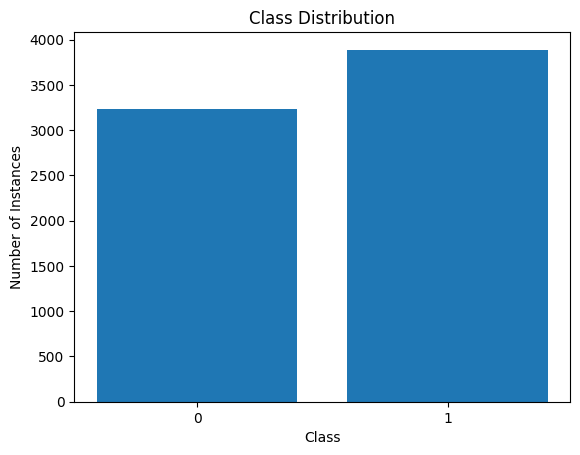

In [272]:

import matplotlib.pyplot as plt

# class labels
labels = ['0', '1']

# number of instances for each class
instances = np.unique(y, return_counts=True)[1]

# create bar chart
plt.bar(labels, instances)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Number of Instances')
plt.show()

## Compute class weights

In [273]:
from sklearn.utils.class_weight import compute_class_weight
class_weight = compute_class_weight(class_weight='balanced',
                                    classes=np.unique(y),
                                    y=y.ravel())
list(class_weight)

[1.1003705991352686, 0.9164094650205762]

## Edge index

In [274]:
adj = nx.to_scipy_sparse_array(G).tocoo()
row = torch.from_numpy(adj.row.astype(np.int64))
col = torch.from_numpy(adj.col.astype(np.int64))
edge_index = torch.stack([row, col], dim=0)

In [275]:
print(X.shape)
print(y.shape)
print(edge_index.shape)

(7126, 128)
(7126, 1)
torch.Size([2, 77774])


In [316]:
from sklearn.preprocessing import OneHotEncoder
y_enc = y.reshape(-1,1)
y_one_hot = OneHotEncoder(sparse_output=False).fit_transform(y.reshape(-1,1))

In [317]:
y_one_hot

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]])

## Create dataset

In [278]:

from sklearn.model_selection import train_test_split
from torch_geometric.data import Data, InMemoryDataset, Dataset
from torch_geometric.loader import DataLoader

class CustomDataset(InMemoryDataset):
    def __init__(self, transform=None):
        super(CustomDataset, self).__init__('.', transform, None, None)

        data = Data(edge_index=edge_index)
        data.x = torch.from_numpy(X).type(torch.float32)
        data.y = torch.from_numpy(y_one_hot).type(torch.float32)
        data.num_classes = len(y_one_hot[0])

        integer_encoded = np.argmax(y_one_hot, axis=1)

        X_train, X_test, y_train, y_test = train_test_split(pd.Series(X[:,0]),
                                                            pd.Series(y_one_hot[:,0]),
                                                            test_size=0.20,
                                                            stratify=integer_encoded,
                                                            random_state=42)
        # create train and test masks for data
        train_mask = torch.zeros(data.num_nodes, dtype=torch.bool)
        test_mask = torch.zeros(data.num_nodes, dtype=torch.bool)
        train_mask[X_train.index] = True
        test_mask[X_test.index] = True
        data['train_mask'] = train_mask
        data['test_mask'] = test_mask

        self.data, self.slices = self.collate([data])

## Dataset info

In [279]:
dataset = CustomDataset()
data = dataset[0]  # Get the first graph object.

print()
print(data)
print('===========================================================================================================')

# Gather some statistics about the graph.
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
# print(f'Number of training nodes: {data.train_mask.sum()}')
# print(f'Training node label rate: {int(data.train_mask.sum()) / data.num_nodes:.2f}')
print(f'Has isolated nodes: {data.has_isolated_nodes()}')
print(f'Has self-loops: {data.has_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')


Data(edge_index=[2, 77774], x=[7126, 128], y=[7126, 2], num_classes=2, train_mask=[7126], test_mask=[7126])
Number of nodes: 7126
Number of edges: 77774
Average node degree: 10.91
Has isolated nodes: False
Has self-loops: True
Is undirected: True


In [280]:
np.unique(data.y[data.test_mask], return_counts=True)

(array([0., 1.], dtype=float32), array([1426, 1426]))

In [281]:
# import torch_geometric.transforms as T

# split = T.RandomNodeSplit(num_val=0.1,  num_test=0.2)
# data = split(data)

# Models

In [282]:
from torchmetrics import AUROC, Accuracy
def train_node_classifier(model, graph, optimizer, criterion, n_epochs=200):

    for epoch in range(1, n_epochs + 1):
        model.train()
        optimizer.zero_grad()
        out, _ = model(graph)
        loss = criterion(out[graph.train_mask], graph.y[graph.train_mask])
        loss.backward()
        optimizer.step()

        pred = out.argmax(dim=1)
        acc, auc = eval_node_classifier(model, graph, graph.train_mask)

        if epoch % 10 == 0:
            print(f'Epoch: {epoch:03d}, Train Loss: {loss:.3f}, Acc: {acc:.3f}, AUC: {auc:.3f}')

    return model


def eval_node_classifier(model, data, mask):

    model.eval()
    preds, _ = model(data)
    preds = preds[data.test_mask]
    trues = data.y.argmax(dim=1)[data.test_mask]
    accuracy = Accuracy(task="multiclass", num_classes=dataset.num_classes).to(device)
    acc = accuracy(preds.argmax(dim=1),  trues)

    auroc = AUROC(task="multiclass", num_classes=dataset.num_classes).to(device)
    auc = auroc(preds,  trues)
    return acc, auc


Visualize function

In [283]:
# Helper function for visualization.
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from matplotlib import colormaps

cm = colormaps['tab20']
cm = [cm.colors[i] for i in range(len(cm.colors))] + [(0.0,0.0,0.0)]
print(cm)

def visualize(h, labels):
    z = TSNE(n_components=2).fit_transform(h.cpu().detach().numpy())

    classes  =np.unique(labels)
    fig, ax = plt.subplots(figsize=(10,10))

    for c in classes:
      idx = np.where(labels==c)
      plt.scatter(z[idx, 0], z[idx, 1], label=f'{c}',s=70, c=cm[c])

    plt.legend()
    plt.show()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765), (0.6823529411764706, 0.7803921568627451, 0.9098039215686274), (1.0, 0.4980392156862745, 0.054901960784313725), (1.0, 0.7333333333333333, 0.47058823529411764), (0.17254901960784313, 0.6274509803921569, 0.17254901960784313), (0.596078431372549, 0.8745098039215686, 0.5411764705882353), (0.8392156862745098, 0.15294117647058825, 0.1568627450980392), (1.0, 0.596078431372549, 0.5882352941176471), (0.5803921568627451, 0.403921568627451, 0.7411764705882353), (0.7725490196078432, 0.6901960784313725, 0.8352941176470589), (0.5490196078431373, 0.33725490196078434, 0.29411764705882354), (0.7686274509803922, 0.611764705882353, 0.5803921568627451), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902), (0.9686274509803922, 0.7137254901960784, 0.8235294117647058), (0.4980392156862745, 0.4980392156862745, 0.4980392156862745), (0.7803921568627451, 0.7803921568627451, 0.7803921568627451), (0.7372549019607844, 0.7411764705882353, 0.1333

In [284]:
def visualize_features(model, data, device, n):
  model.to(device)
  model.eval()

  data.to(device)

  _, features = model(data)
  y_enc = np.argmax(data.y.cpu().detach().numpy(), axis=1)
  visualize(features[:n], labels=y_enc[:n])

Device

In [285]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [286]:
data.to(device)

Data(edge_index=[2, 77774], x=[7126, 128], y=[7126, 2], num_classes=2, train_mask=[7126], test_mask=[7126])

## MLP

In [287]:
import torch
from torch.nn import Linear
import torch.nn.functional as F


class MLP(torch.nn.Module):
    def __init__(self):
        super().__init__()
        torch.manual_seed(12345)
        self.lin1 = Linear(dataset.num_features, 32)
        self.lin2 = Linear(32, dataset.num_classes)

    def forward(self, data):
        x = data.x
        features = F.relu(self.lin1(x))
        features = F.dropout(features, p=0.5, training=self.training)
        logits = self.lin2(features)
        out = F.softmax(logits, dim=1)
        return out, features

mlp = MLP().to(device)
print(mlp)

MLP(
  (lin1): Linear(in_features=128, out_features=32, bias=True)
  (lin2): Linear(in_features=32, out_features=2, bias=True)
)


### Evaluate before training


In [288]:
test_acc, test_auc = eval_node_classifier(mlp, data, data.test_mask)
print(f'Test Acc: {test_acc:.3f}, Test auc: {test_auc:.3f}')

Test Acc: 0.523, Test auc: 0.520


### Visualization of the node embeddings before training

<ipython-input-283-a8596b3d12f7>:20: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(z[idx, 0], z[idx, 1], label=f'{c}',s=70, c=cm[c])


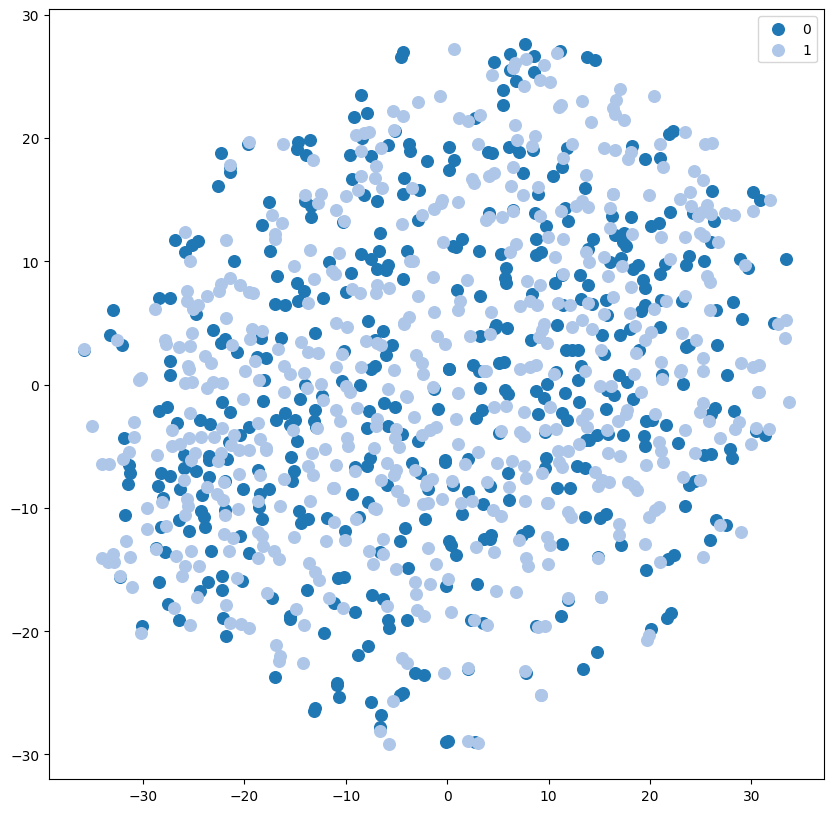

In [289]:
visualize_features(mlp, data, device, 1000)

### Training

In [290]:
optimizer = torch.optim.Adam(mlp.parameters(), lr=0.01, weight_decay=5e-4)

class_weights = torch.FloatTensor(class_weight).to(device)
criterion = torch.nn.CrossEntropyLoss(weight=class_weights)

mlp = train_node_classifier(mlp, data, optimizer, criterion, n_epochs=100)


Epoch: 010, Train Loss: 0.683, Acc: 0.501, AUC: 0.498
Epoch: 020, Train Loss: 0.668, Acc: 0.507, AUC: 0.506
Epoch: 030, Train Loss: 0.655, Acc: 0.511, AUC: 0.511
Epoch: 040, Train Loss: 0.643, Acc: 0.510, AUC: 0.513
Epoch: 050, Train Loss: 0.630, Acc: 0.504, AUC: 0.508
Epoch: 060, Train Loss: 0.615, Acc: 0.517, AUC: 0.511
Epoch: 070, Train Loss: 0.611, Acc: 0.520, AUC: 0.512
Epoch: 080, Train Loss: 0.603, Acc: 0.513, AUC: 0.513
Epoch: 090, Train Loss: 0.599, Acc: 0.512, AUC: 0.514
Epoch: 100, Train Loss: 0.591, Acc: 0.514, AUC: 0.520


### Evaluate after training


In [291]:
test_acc, test_auc = eval_node_classifier(mlp, data, data.test_mask)
print(f'Test Acc: {test_acc:.3f}, Test auc: {test_auc:.3f}')

Test Acc: 0.514, Test auc: 0.520


### Visualization of the node embeddings after training

<ipython-input-221-a8596b3d12f7>:20: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(z[idx, 0], z[idx, 1], label=f'{c}',s=70, c=cm[c])


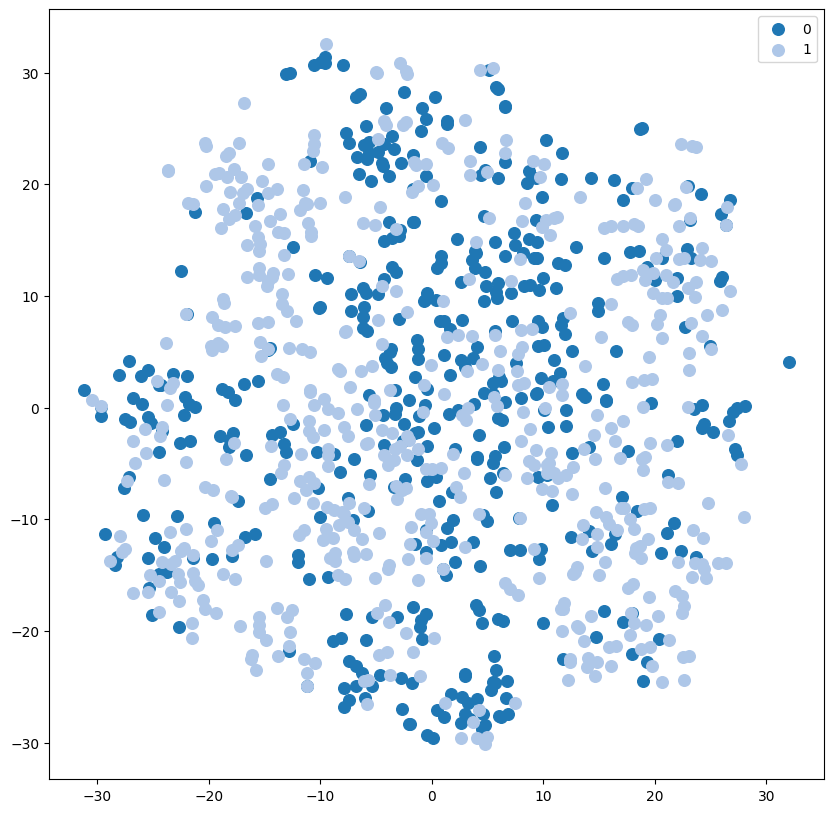

In [230]:
visualize_features(mlp, data, device, 1000)

## GNN GCNConv

In [231]:
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

class GCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        torch.manual_seed(1234567)
        self.conv1 = GCNConv(dataset.num_features, 16, add_self_loops=False, improved=True, normalize=True)
        self.conv2 = GCNConv(16, 16, add_self_loops=False, improved=True, normalize=True)
        self.classifier = Linear(16, dataset.num_classes)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = F.relu(self.conv1(x, edge_index))
        x = F.dropout(x, p=0.5, training=self.training)
        features = F.relu(self.conv2(x, edge_index))
        features = F.dropout(features, p=0.2, training=self.training)

        out = self.classifier(features)

        return out, features

gcn = GCN().to(device)
print(gcn)

GCN(
  (conv1): GCNConv(128, 16)
  (conv2): GCNConv(16, 16)
  (classifier): Linear(in_features=16, out_features=2, bias=True)
)


### Evaluate before training

In [232]:
test_acc, test_auc = eval_node_classifier(gcn, data, data.test_mask)
print(f'Test Acc: {test_acc:.3f}, Test auc: {test_auc:.3f}')

Test Acc: 0.454, Test auc: 0.531


### Visualization of the node embeddings before training

<ipython-input-221-a8596b3d12f7>:20: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(z[idx, 0], z[idx, 1], label=f'{c}',s=70, c=cm[c])


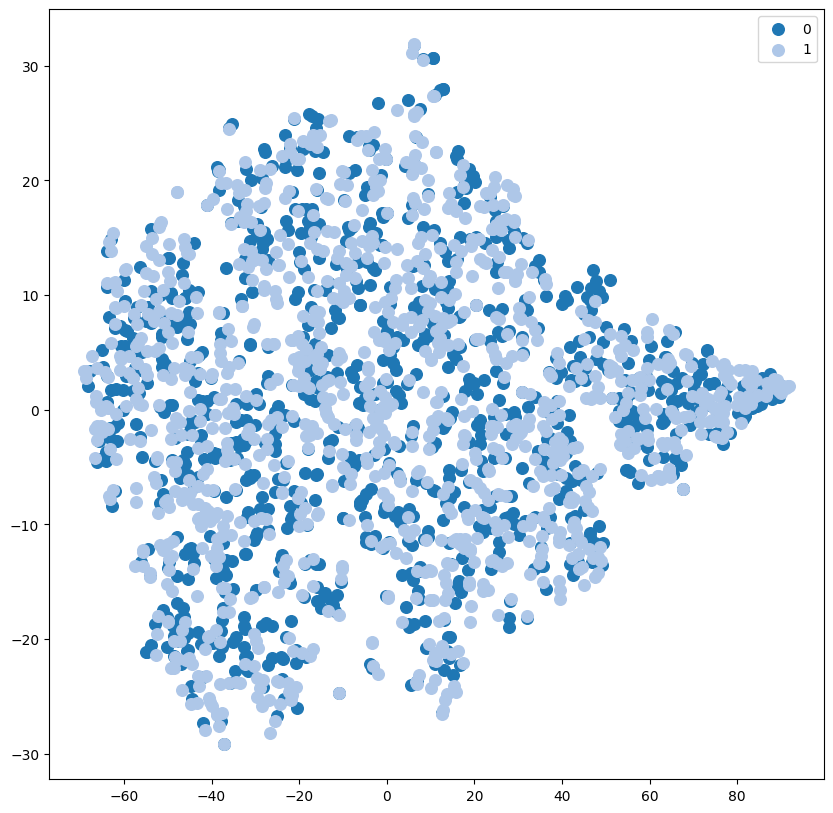

In [233]:
visualize_features(gcn, data, device, 2000)

### Training

In [234]:
optimizer = torch.optim.Adam(gcn.parameters(), lr=0.01, weight_decay=5e-4)

class_weights = torch.FloatTensor(class_weight).to(device)
criterion = torch.nn.CrossEntropyLoss(weight=class_weights)

gcn = train_node_classifier(gcn, data, optimizer, criterion, n_epochs=100)


Epoch: 010, Train Loss: 0.694, Acc: 0.459, AUC: 0.518
Epoch: 020, Train Loss: 0.693, Acc: 0.515, AUC: 0.511
Epoch: 030, Train Loss: 0.692, Acc: 0.482, AUC: 0.491
Epoch: 040, Train Loss: 0.691, Acc: 0.487, AUC: 0.492
Epoch: 050, Train Loss: 0.688, Acc: 0.520, AUC: 0.498
Epoch: 060, Train Loss: 0.688, Acc: 0.486, AUC: 0.491
Epoch: 070, Train Loss: 0.688, Acc: 0.487, AUC: 0.488
Epoch: 080, Train Loss: 0.682, Acc: 0.473, AUC: 0.483
Epoch: 090, Train Loss: 0.680, Acc: 0.504, AUC: 0.487
Epoch: 100, Train Loss: 0.678, Acc: 0.489, AUC: 0.486


### Evaluate after training

In [235]:
test_acc, test_auc = eval_node_classifier(gcn, data, data.test_mask)
print(f'Test Acc: {test_acc:.3f}, Test auc: {test_auc:.3f}')

Test Acc: 0.489, Test auc: 0.486


### Visualization of the node embeddings after training

<ipython-input-221-a8596b3d12f7>:20: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(z[idx, 0], z[idx, 1], label=f'{c}',s=70, c=cm[c])


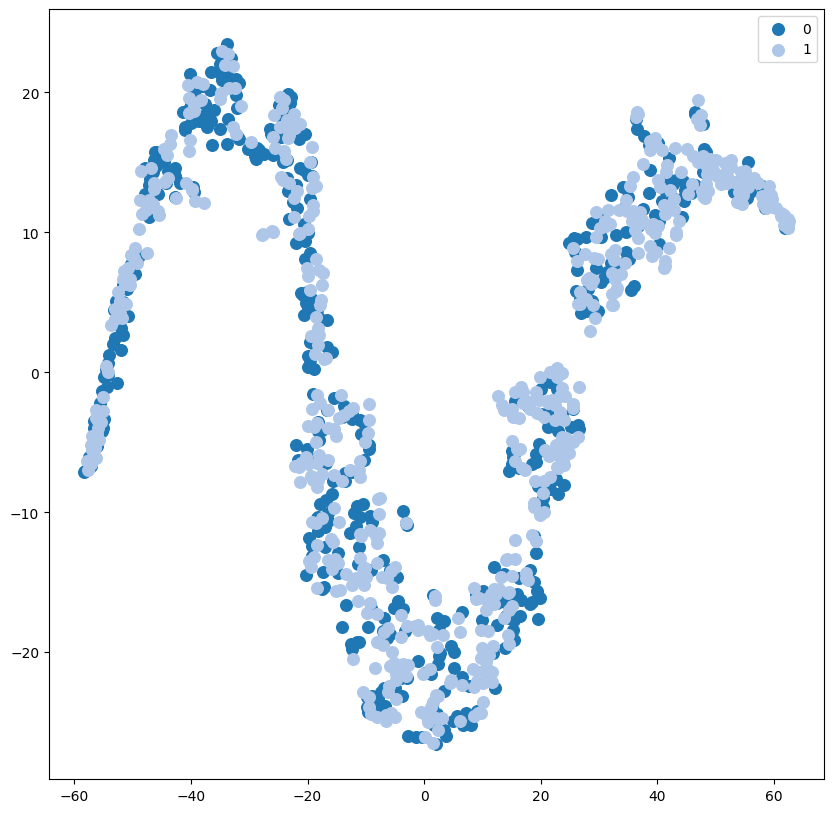

In [236]:
visualize_features(gcn, data, device, 1000)

# Diff 2 vec

In [318]:
from karateclub import Diff2Vec

model = Diff2Vec(diffusion_number=2, diffusion_cover=20, dimensions=16)
model.fit(G)
X = model.get_embedding()

In [319]:
X.shape

(7126, 16)

In [320]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [321]:
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

downstream_model = LogisticRegression(random_state=0).fit(X_train, y_train)
y_hat = downstream_model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_hat)
print('AUC: {:.4f}'.format(auc))

AUC: 0.6097


# Dataset info

In [322]:

from sklearn.model_selection import train_test_split
from torch_geometric.data import Data, InMemoryDataset, Dataset
from torch_geometric.loader import DataLoader

class CustomDataset(InMemoryDataset):
    def __init__(self, transform=None):
        super(CustomDataset, self).__init__('.', transform, None, None)

        data = Data(edge_index=edge_index)
        data.x = torch.from_numpy(X).type(torch.float32)
        data.y = torch.from_numpy(y_one_hot).type(torch.float32)
        data.num_classes = len(y_one_hot[0])

        integer_encoded = np.argmax(y_one_hot, axis=1)

        X_train, X_test, y_train, y_test = train_test_split(pd.Series(X[:,0]),
                                                            pd.Series(y_one_hot[:,0]),
                                                            test_size=0.20,
                                                            stratify=integer_encoded,
                                                            random_state=42)
        # create train and test masks for data
        train_mask = torch.zeros(data.num_nodes, dtype=torch.bool)
        test_mask = torch.zeros(data.num_nodes, dtype=torch.bool)
        train_mask[X_train.index] = True
        test_mask[X_test.index] = True
        data['train_mask'] = train_mask
        data['test_mask'] = test_mask

        self.data, self.slices = self.collate([data])

In [323]:
dataset = CustomDataset()
data = dataset[0]  # Get the first graph object.

print()
print(data)
print('===========================================================================================================')

# Gather some statistics about the graph.
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
# print(f'Number of training nodes: {data.train_mask.sum()}')
# print(f'Training node label rate: {int(data.train_mask.sum()) / data.num_nodes:.2f}')
print(f'Has isolated nodes: {data.has_isolated_nodes()}')
print(f'Has self-loops: {data.has_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')


Data(edge_index=[2, 77774], x=[7126, 16], y=[7126, 2], num_classes=2, train_mask=[7126], test_mask=[7126])
Number of nodes: 7126
Number of edges: 77774
Average node degree: 10.91
Has isolated nodes: False
Has self-loops: True
Is undirected: True


# Models

In [324]:
from torchmetrics import AUROC, Accuracy
def train_node_classifier(model, graph, optimizer, criterion, n_epochs=200):

    for epoch in range(1, n_epochs + 1):
        model.train()
        optimizer.zero_grad()
        out, _ = model(graph)
        loss = criterion(out[graph.train_mask], graph.y[graph.train_mask])
        loss.backward()
        optimizer.step()

        pred = out.argmax(dim=1)
        acc, auc = eval_node_classifier(model, graph, graph.train_mask)

        if epoch % 10 == 0:
            print(f'Epoch: {epoch:03d}, Train Loss: {loss:.3f}, Acc: {acc:.3f}, AUC: {auc:.3f}')

    return model


def eval_node_classifier(model, data, mask):

    model.eval()
    preds, _ = model(data)
    preds = preds[data.test_mask]
    trues = data.y.argmax(dim=1)[data.test_mask]
    accuracy = Accuracy(task="multiclass", num_classes=dataset.num_classes).to(device)
    acc = accuracy(preds.argmax(dim=1),  trues)

    auroc = AUROC(task="multiclass", num_classes=dataset.num_classes).to(device)
    auc = auroc(preds,  trues)
    return acc, auc


Visualize function

In [325]:
# Helper function for visualization.
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from matplotlib import colormaps

cm = colormaps['tab20']
cm = [cm.colors[i] for i in range(len(cm.colors))] + [(0.0,0.0,0.0)]
print(cm)

def visualize(h, labels):
    z = TSNE(n_components=2).fit_transform(h.cpu().detach().numpy())

    classes  =np.unique(labels)
    fig, ax = plt.subplots(figsize=(10,10))

    for c in classes:
      idx = np.where(labels==c)
      plt.scatter(z[idx, 0], z[idx, 1], label=f'{c}',s=70, c=cm[c])

    plt.legend()
    plt.show()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765), (0.6823529411764706, 0.7803921568627451, 0.9098039215686274), (1.0, 0.4980392156862745, 0.054901960784313725), (1.0, 0.7333333333333333, 0.47058823529411764), (0.17254901960784313, 0.6274509803921569, 0.17254901960784313), (0.596078431372549, 0.8745098039215686, 0.5411764705882353), (0.8392156862745098, 0.15294117647058825, 0.1568627450980392), (1.0, 0.596078431372549, 0.5882352941176471), (0.5803921568627451, 0.403921568627451, 0.7411764705882353), (0.7725490196078432, 0.6901960784313725, 0.8352941176470589), (0.5490196078431373, 0.33725490196078434, 0.29411764705882354), (0.7686274509803922, 0.611764705882353, 0.5803921568627451), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902), (0.9686274509803922, 0.7137254901960784, 0.8235294117647058), (0.4980392156862745, 0.4980392156862745, 0.4980392156862745), (0.7803921568627451, 0.7803921568627451, 0.7803921568627451), (0.7372549019607844, 0.7411764705882353, 0.1333

In [326]:
def visualize_features(model, data, device, n):
  model.to(device)
  model.eval()

  data.to(device)

  _, features = model(data)
  y_enc = np.argmax(data.y.cpu().detach().numpy(), axis=1)
  visualize(features[:n], labels=y_enc[:n])

Device

In [327]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [328]:
data.to(device)

Data(edge_index=[2, 77774], x=[7126, 16], y=[7126, 2], num_classes=2, train_mask=[7126], test_mask=[7126])

## MLP

In [329]:
import torch
from torch.nn import Linear
import torch.nn.functional as F


class MLP(torch.nn.Module):
    def __init__(self):
        super().__init__()
        torch.manual_seed(12345)
        self.lin1 = Linear(dataset.num_features, 32)
        self.lin2 = Linear(32, dataset.num_classes)

    def forward(self, data):
        x = data.x
        features = F.relu(self.lin1(x))
        features = F.dropout(features, p=0.5, training=self.training)
        logits = self.lin2(features)
        out = F.softmax(logits, dim=1)
        return out, features

mlp = MLP().to(device)
print(mlp)

MLP(
  (lin1): Linear(in_features=16, out_features=32, bias=True)
  (lin2): Linear(in_features=32, out_features=2, bias=True)
)


### Evaluate before training


In [330]:
test_acc, test_auc = eval_node_classifier(mlp, data, data.test_mask)
print(f'Test Acc: {test_acc:.3f}, Test auc: {test_auc:.3f}')

Test Acc: 0.498, Test auc: 0.558


### Visualization of the node embeddings before training

<ipython-input-325-a8596b3d12f7>:20: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(z[idx, 0], z[idx, 1], label=f'{c}',s=70, c=cm[c])


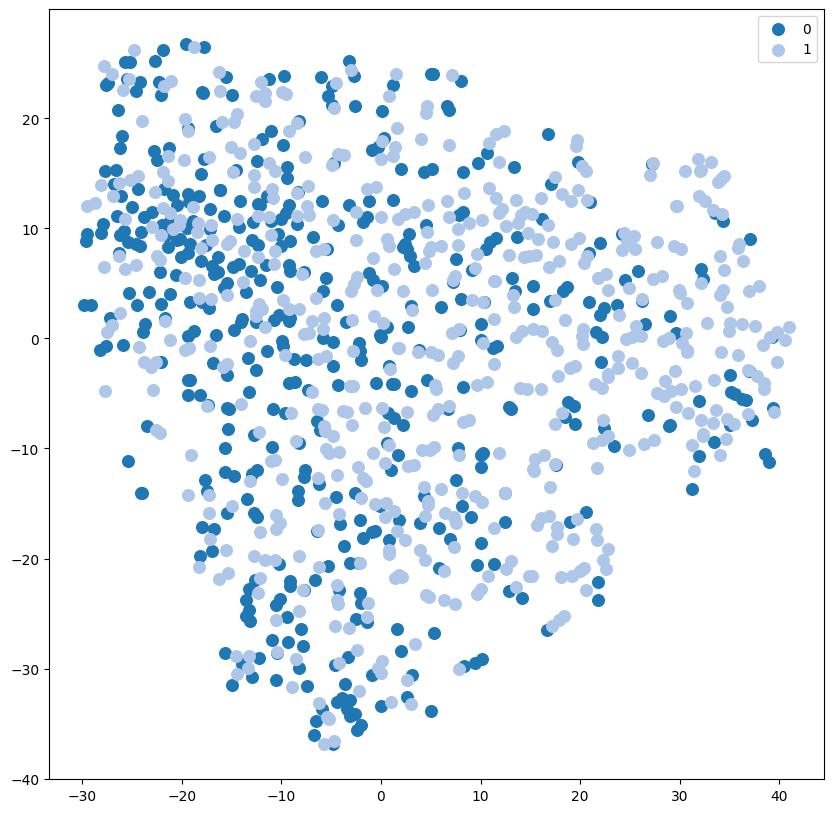

In [331]:
visualize_features(mlp, data, device, 1000)

### Training

In [332]:
optimizer = torch.optim.Adam(mlp.parameters(), lr=0.01, weight_decay=5e-4)

class_weights = torch.FloatTensor(class_weight).to(device)
criterion = torch.nn.CrossEntropyLoss(weight=class_weights)

mlp = train_node_classifier(mlp, data, optimizer, criterion, n_epochs=100)


Epoch: 010, Train Loss: 0.675, Acc: 0.555, AUC: 0.601
Epoch: 020, Train Loss: 0.670, Acc: 0.558, AUC: 0.603
Epoch: 030, Train Loss: 0.669, Acc: 0.556, AUC: 0.601
Epoch: 040, Train Loss: 0.669, Acc: 0.568, AUC: 0.602
Epoch: 050, Train Loss: 0.666, Acc: 0.574, AUC: 0.602
Epoch: 060, Train Loss: 0.665, Acc: 0.567, AUC: 0.604
Epoch: 070, Train Loss: 0.663, Acc: 0.567, AUC: 0.602
Epoch: 080, Train Loss: 0.665, Acc: 0.574, AUC: 0.606
Epoch: 090, Train Loss: 0.666, Acc: 0.570, AUC: 0.604
Epoch: 100, Train Loss: 0.662, Acc: 0.567, AUC: 0.605


### Evaluate after training


In [333]:
test_acc, test_auc = eval_node_classifier(mlp, data, data.test_mask)
print(f'Test Acc: {test_acc:.3f}, Test auc: {test_auc:.3f}')

Test Acc: 0.567, Test auc: 0.605


### Visualization of the node embeddings after training

<ipython-input-325-a8596b3d12f7>:20: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(z[idx, 0], z[idx, 1], label=f'{c}',s=70, c=cm[c])


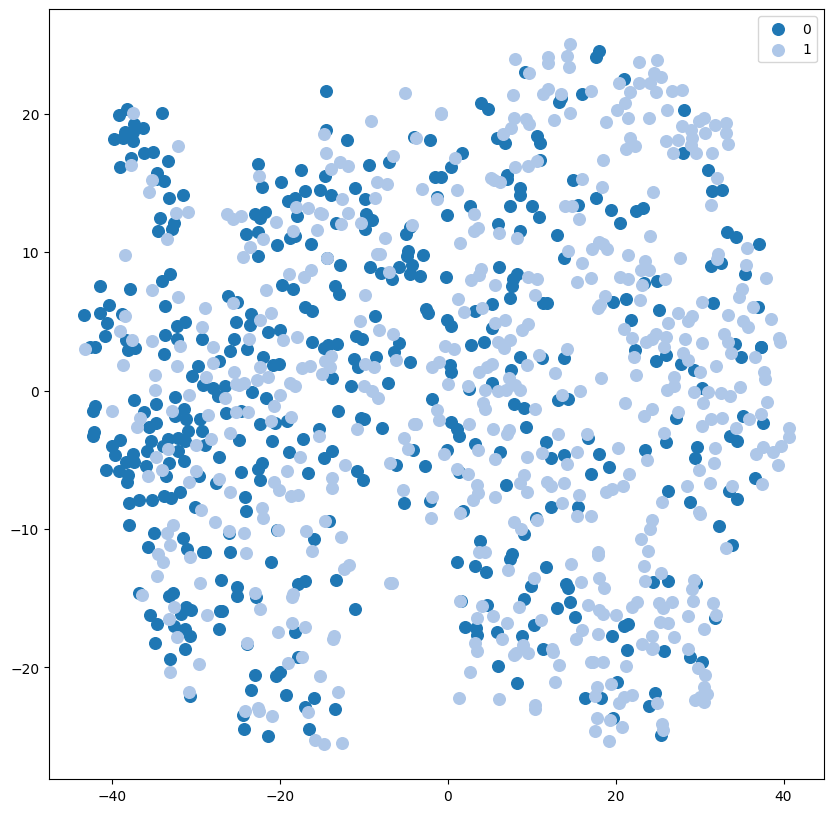

In [334]:
visualize_features(mlp, data, device, 1000)

## GNN GCNConv

In [335]:
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

class GCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        torch.manual_seed(1234567)
        self.conv1 = GCNConv(dataset.num_features, 16, add_self_loops=False, improved=True, normalize=True)
        self.conv2 = GCNConv(16, 16, add_self_loops=False, improved=True, normalize=True)
        self.classifier = Linear(16, dataset.num_classes)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = F.relu(self.conv1(x, edge_index))
        x = F.dropout(x, p=0.5, training=self.training)
        features = F.relu(self.conv2(x, edge_index))
        features = F.dropout(features, p=0.2, training=self.training)

        out = self.classifier(features)

        return out, features

gcn = GCN().to(device)
print(gcn)

GCN(
  (conv1): GCNConv(16, 16)
  (conv2): GCNConv(16, 16)
  (classifier): Linear(in_features=16, out_features=2, bias=True)
)


### Evaluate before training

In [336]:
test_acc, test_auc = eval_node_classifier(gcn, data, data.test_mask)
print(f'Test Acc: {test_acc:.3f}, Test auc: {test_auc:.3f}')

Test Acc: 0.455, Test auc: 0.482


### Visualization of the node embeddings before training

<ipython-input-325-a8596b3d12f7>:20: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(z[idx, 0], z[idx, 1], label=f'{c}',s=70, c=cm[c])


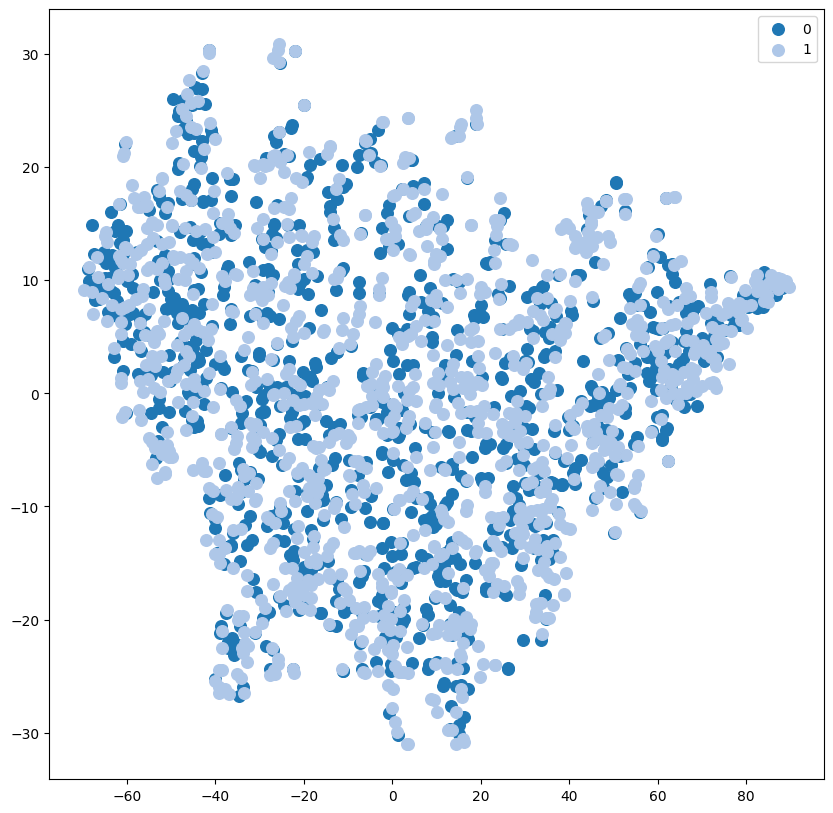

In [337]:
visualize_features(gcn, data, device, 2000)

### Training

In [338]:
optimizer = torch.optim.Adam(gcn.parameters(), lr=0.01, weight_decay=5e-4)

class_weights = torch.FloatTensor(class_weight).to(device)
criterion = torch.nn.CrossEntropyLoss(weight=class_weights)

gcn = train_node_classifier(gcn, data, optimizer, criterion, n_epochs=100)


Epoch: 010, Train Loss: 0.692, Acc: 0.482, AUC: 0.543
Epoch: 020, Train Loss: 0.689, Acc: 0.501, AUC: 0.544
Epoch: 030, Train Loss: 0.686, Acc: 0.512, AUC: 0.546
Epoch: 040, Train Loss: 0.685, Acc: 0.514, AUC: 0.546
Epoch: 050, Train Loss: 0.683, Acc: 0.518, AUC: 0.544
Epoch: 060, Train Loss: 0.681, Acc: 0.519, AUC: 0.542
Epoch: 070, Train Loss: 0.681, Acc: 0.518, AUC: 0.543
Epoch: 080, Train Loss: 0.678, Acc: 0.527, AUC: 0.547
Epoch: 090, Train Loss: 0.677, Acc: 0.524, AUC: 0.548
Epoch: 100, Train Loss: 0.675, Acc: 0.536, AUC: 0.554


### Evaluate after training

In [339]:
test_acc, test_auc = eval_node_classifier(gcn, data, data.test_mask)
print(f'Test Acc: {test_acc:.3f}, Test auc: {test_auc:.3f}')

Test Acc: 0.536, Test auc: 0.554


### Visualization of the node embeddings after training

<ipython-input-325-a8596b3d12f7>:20: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(z[idx, 0], z[idx, 1], label=f'{c}',s=70, c=cm[c])


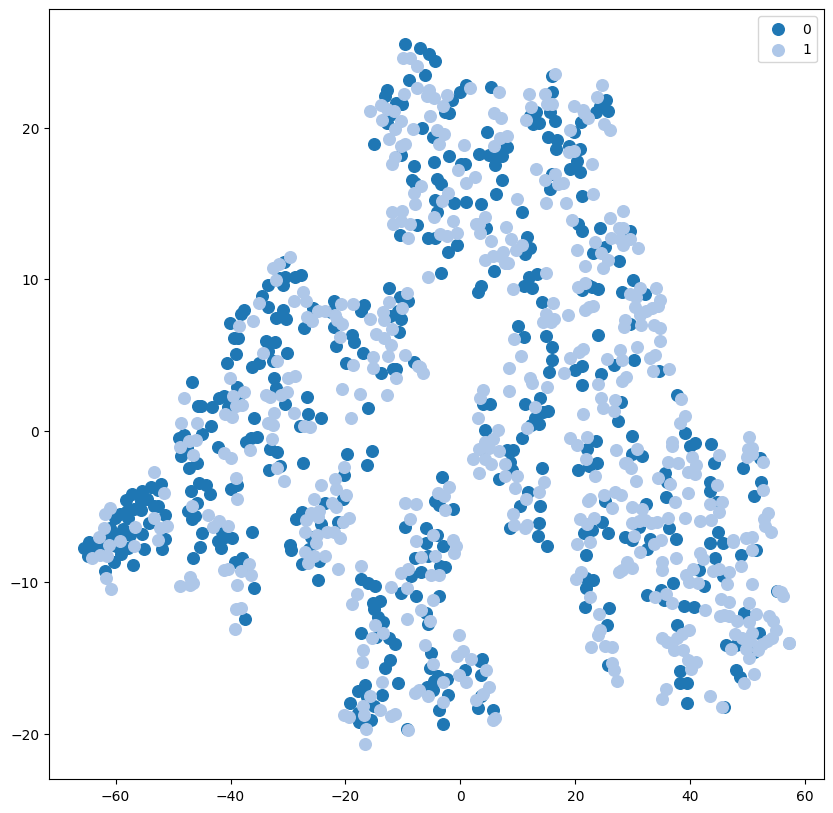

In [340]:
visualize_features(gcn, data, device, 1000)